# Conspiracy Theory Analysis on Truth Social

## Imports and DB Connection

In [1]:
import mysql.connector
import pandas as pd
from sqlalchemy import create_engine
import pymysql

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import re

from wordcloud import WordCloud

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jackson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jackson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
plt.style.use('ggplot')

In [4]:
psw = ''

conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root', 
    password = psw,
    database = 'truth_social')

cursor = conn.cursor()

## Util

In [5]:
def clean_text(text):
    text = re.sub(r'<emoji:\s\w+>', '', text) # Remove emoji
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove mentions (@Maria)
    #text = re.sub(r'https?\/\/S+', '',  text) # remove the hyperlink
    #text = re.sub(r'http\S+', '',  text)      # remove the hyperlink
    #text = re.sub(r'www\S+', '',  text)       # remove the www
    text = re.sub(r'[^\w\s]', '', text)       # Remove punct
    
    return text

In [6]:
cursor.execute("SELECT * FROM truths")
headers = [column[0] for column in cursor.description]
truths = pd.DataFrame(cursor.fetchall(), columns=headers)
truths.head()

,id,timestamp,time_scraped,is_retruth,is_reply,author,like_count,retruth_count,reply_count,text,url,truth_retruthed,external_id
0,18,2022-09-11 20:24:00,2022-09-14 17:27:43,0,0,26,12300,2760,590,"On this day, let’s also never forget those who...",https://truthsocial.com/@EricTrump/posts/10898...,-1,108982585515785274
1,21,2022-07-30 19:05:00,2022-09-14 20:54:37,0,0,26,5660,789,346,#LIVGolf is off the charts! @TrumpBedminster,https://truthsocial.com/@EricTrump/posts/10873...,-1,108738795367938727
2,26,2022-06-22 09:47:00,2022-09-14 22:11:40,1,0,26,0,0,0,The deal on “Gun Control” currently being stru...,https://truthsocial.com/@EricTrump/posts/10852...,2420,108527713196735892
3,29,2022-08-19 18:24:00,2022-09-14 22:30:01,0,0,26,15700,3320,1110,<emoji: us><emoji: us><emoji: us>,https://truthsocial.com/@EricTrump/posts/10885...,-1,108851881295512464
4,34,2022-05-13 13:58:00,2022-09-14 22:57:18,0,1,26,2640,401,67,See you soon!!!,https://truthsocial.com/@EricTrump/posts/10829...,-1,108295925937467612


In [7]:
truths.dropna(subset=['text'], inplace=True)

In [27]:
#truths['text'] = truths['text'].apply(clean_text)
#truths['text']

## Analyzing Conspiracy related posts

### Flat Earth

* Lots of posts are in favor of the flat earth theory, generally based on religious reasons.
* There are also posts criticizing and/or arguing against it.

In [9]:
flat_earth = truths[truths['text'].str.contains(r'\bflat earth\b', case=False)]


for index, row in flat_earth.iterrows():
    print(row['text'])
    print(f"Likes: {row['like_count']}  Replies: {row['reply_count']}  Retruths: {row['retruth_count']}")
    print('\n')

Is there seriously a flat earth debate going on in my thread?   I already answered this for you. Case closed.   Clap twice if you can hear my voice. <emoji: clap><emoji: clap>
Likes: 412  Replies: 104  Retruths: 43


That doesnt bother me, until we get into dracos or Flat Earth or something REALLY off the wall like that. But if someone comes at me with some solid sauce and plausible thought processes, then Im willing to entertain. But as you can imagine they better be ready to defend, as I WILL have questions lol.
Likes: 5  Replies: 2  Retruths: 1


There is a link in my bio that takes you to my videos on the subject. LONG, but packed with info. Sorry, no flat earth or alien craft, but plenty of other wild to make you shake your head in OMG
Likes: 3  Replies: 1  Retruths: 1


And here come the flat earth folks who don’t understand basic physics and math and photography.  If the earth wasn’t round, every bridge we have would fall down, because civil engineers calculate the earths curvat

### QAnon

QAnon is a wide-ranging conspiracy theory that says that President Trump is waging a secret war against elite Satan-worshipping paedophiles in government, business and the media. 

* Lots of posts use the hashtags ```#MAGA``` wich means "Make America great again" and ```#WWG1WGA``` ("Where We Go One, We Go All")
* Other QAnon related phrases are “The Storm“, “The Calm Before the Storm” and “Qanon8chan“. The acronyms MAGA and KAG – the acronyms of the Trump 2016 and 2020 campaigns – are often frequently alongside since most social media users posting in support of QAnon are also supporters of President Trump.


In [10]:
qanon = truths[truths['text'].str.contains(r'\bqanon\b', case=False)]

for index, row in qanon.iterrows():
    print(row['text'])
    print(f"Likes: {row['like_count']}  Replies: {row['reply_count']}  Retruths: {row['retruth_count']}")
    print('\n')

The New York Times is colluding with left-wing “fact check” fraudsters to smear Truth Social and its users as conspiracy theorists.  But the biggest conspiracy theorists in America are the BlueAnon nutjobs who work at NYT, CNN, and MSNBC. https://thefederalist.com/2022/08/29/new-york-times-amplifies-misinformation-groups-talking-points-to-smear-truth-social-as-qanon-haven/
Likes: 756  Replies: 81  Retruths: 313


Qanon has nothing to do with 9/11 conspiracies.
Likes: 18  Replies: 6  Retruths: 0


The writer of this article doesn’t know the difference between vote harvesting—legal in some states—and paid ballot trafficking, which is illegal in all 50 states.   https://www.vice.com/en/article/epxegw/supreme-court-roe-abortion-qanon
Likes: 1540  Replies: 110  Retruths: 497


https://www.redvoicemedia.com/2022/09/gen-flynn-shares-unnerving-theory-on-the-origins-of-qanon/
Likes: 892  Replies: 79  Retruths: 408


WTF is a “QAnon”?
Likes: 6  Replies: 0  Retruths: 0


“QAnon”<emoji: joy>
Likes

## External Links Analysis

In [19]:
def extract_links(text):
    urls = re.findall(r'(https?://\S+|www\.\S+)', text)
    return urls

def extract_domain(link):
    match = re.search(r"(https?://)?(www\d?\.)?(?P<domain>[\w.-]+)", link)
    
    if match:
        return match.group("domain")
    
    return None

In [12]:
# Extract links from posts into new column and explode
truths['links'] = truths['text'].apply(extract_links)
truths = truths.explode('links')

In [23]:
truths_with_links = truths.dropna(subset=['links']).copy()
truths_with_links.shape

(204543, 14)

In [24]:
# Extract links domain
domain_search_regexp = 'https?://([A-Za-z_0-9.-]+).*|www\.([A-Za-z_0-9.-]+).*'
#truths_with_links['domain'] = truths_with_links['links'].apply(lambda x: re.search(domain_search_regexp, x).group(1) 
                                 #if re.search(domain_search_regexp, x) else None)

truths_with_links['domain'] = truths_with_links['links'].apply(extract_domain)

In [25]:
truths_with_links

,id,timestamp,time_scraped,is_retruth,is_reply,author,like_count,retruth_count,reply_count,text,url,truth_retruthed,external_id,links,domain
9,41,2022-08-29 21:30:00,2022-09-14 23:15:18,0,0,26,7930,2500,1010,https://nypost.com/2022/08/29/fbi-agent-resign...,https://truthsocial.com/@EricTrump/posts/10890...,-1,108909234033014750,https://nypost.com/2022/08/29/fbi-agent-resign...,nypost.com
46,78,2022-05-22 19:23:00,2022-09-15 01:51:50,0,0,26,9020,1830,518,One of the most beautiful places on earth! Com...,https://truthsocial.com/@EricTrump/posts/10834...,26,108348166778636199,www.TrumpWinery.com,TrumpWinery.com
47,79,2022-05-12 16:30:00,2022-09-15 01:51:51,1,0,26,3620,832,137,We look forward to hosting you at the all-new ...,https://truthsocial.com/@EricTrump/posts/10834...,26,108340573840919538,www.LIVGolf.com.,LIVGolf.com.
51,83,2022-05-19 16:27:00,2022-09-15 01:56:31,0,0,26,9310,2920,315,Amazing book by Kash Patel!￼ https://brave-bo...,https://truthsocial.com/@EricTrump/posts/10833...,26,108330487343291459,https://brave-books-series.myshopify.com/produ...,brave-books-series.myshopify.com
63,95,2022-05-03 22:04:00,2022-09-15 01:56:41,0,0,26,10400,1890,291,Cheers to a big night in Ohio! <emoji: us><emo...,https://truthsocial.com/@EricTrump/posts/10824...,26,108241214755116853,www.TrumpWinery.com,TrumpWinery.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837956,1060920,NaT,2023-01-05 12:37:57,0,0,27,4740,1260,60,https://www.miamiherald.com/news/politics-gove...,https://truthsocial.com/@realDonaldTrump/posts...,-1,109128445470845784,https://www.miamiherald.com/news/politics-gove...,miamiherald.com
837960,1060924,NaT,2023-01-05 12:37:57,0,0,27,11800,3610,412,"“There’s no sainthood for Obama, National Arch...",https://truthsocial.com/@realDonaldTrump/posts...,-1,109162795110453144,https://nypost.com/2022/08/14/theres-no-sainth...,nypost.com
837964,1060928,NaT,2023-01-05 12:37:57,0,0,27,19500,4860,1400,https://www.foxnews.com/politics/trump-loves-t...,https://truthsocial.com/@realDonaldTrump/posts...,-1,109166668566312401,https://www.foxnews.com/politics/trump-loves-t...,foxnews.com
837968,1060932,NaT,2023-01-05 12:37:57,0,0,27,18400,4160,457,https://www.newsnationnow.com/cuomo-show/oreil...,https://truthsocial.com/@realDonaldTrump/posts...,-1,109168120895532903,https://www.newsnationnow.com/cuomo-show/oreil...,newsnationnow.com


In [28]:
print(f"Unique links: {truths_with_links['links'].nunique()}")

Unique links: 129716


In [32]:
domain_count = truths_with_links['domain'].value_counts()
print(f"Unique domains: {domain_count.shape[0]}")

Unique domains: 5075


C:\Users\Jackson\AppData\Local\Temp\ipykernel_48440\199178666.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  domain_count.index = domain_count.index.str.replace(r'\.com$', '')


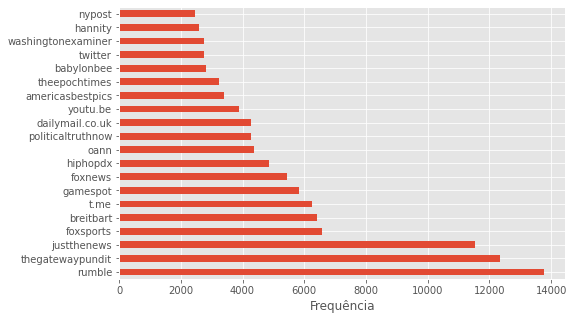

In [40]:
domain_count.index = domain_count.index.str.replace(r'\.com$', '')

plt.figure(figsize=(8, 5))
domain_count.head(20).plot(kind='barh')
plt.xlabel('Frequência')
plt.show()

## Hashtags Usage Analysis

**\#QAnon**

In [58]:
res = truths[truths['text'].str.contains(r'#qanon', case=False)]
print(f"Number of posts:{res.shape[0]}")
reactions = res['like_count'].sum() + res['retruth_count'].sum() + res['reply_count'].sum()
print(f"Number of reactions (likes, retruths and replies): {reactions}")

Number of posts:248
Number of reactions (likes, retruths and replies): 3254


**\#MAGA**

In [60]:
res = truths[truths['text'].str.contains(r'#maga', case=False)]
print(f"Number of posts:{res.shape[0]}")
reactions = res['like_count'].sum() + res['retruth_count'].sum() + res['reply_count'].sum()
print(f"Number of reactions (likes, retruths and replies): {reactions}")

Number of posts:4775
Number of reactions (likes, retruths and replies): 790520


**\#WWG1WGA**

In [61]:
res = truths[truths['text'].str.contains(r'#WWG1WGA', case=False)]
print(f"Number of posts:{res.shape[0]}")
reactions = res['like_count'].sum() + res['retruth_count'].sum() + res['reply_count'].sum()
print(f"Number of reactions (likes, retruths and replies): {reactions}")

Number of posts:1587
Number of reactions (likes, retruths and replies): 73286


**\#thegreatawakening**

In [62]:
res = truths[truths['text'].str.contains(r'#thegreatawakening', case=False)]
print(f"Number of posts:{res.shape[0]}")
reactions = res['like_count'].sum() + res['retruth_count'].sum() + res['reply_count'].sum()
print(f"Number of reactions (likes, retruths and replies): {reactions}")

Number of posts:175
Number of reactions (likes, retruths and replies): 16028


**\#electionfraud**

In [63]:
res = truths[truths['text'].str.contains(r'#electionfraud', case=False)]
print(f"Number of posts:{res.shape[0]}")
reactions = res['like_count'].sum() + res['retruth_count'].sum() + res['reply_count'].sum()
print(f"Number of reactions (likes, retruths and replies): {reactions}")

Number of posts:473
Number of reactions (likes, retruths and replies): 117205
